# Activité 2 : analyse des corrélations et des associations (EDA)

<img src="https://cdn.pixabay.com/photo/2013/07/12/13/22/chain-146909_1280.png" alt="lien" width="400"/>

#### [Pierre-Loic BAYART](https://www.linkedin.com/in/pierreloicbayart/) - Formation développeur d'applications spécialisation data analyst - Webforce3 - Grenoble Ecole de Management

### Code pour indiquer l'importance des notions traitées dans cette activité

- #### 🥇 : connaissance fondamentale pour l'analyse de données
- #### 🥈 : connaissance importante pour l'analyse de données
- #### 🥉 : connaissance moins importante pour l'analyse de données
> Si rien n'est indiqué, il s'agit de connaissances fondamentales pour l'analyse de données

## 🔍 Recherche d'informations

En recherchant sur le web, trouver les réponses aux questions suivantes :

### - Qu'est-ce qu'un tableau de contingence ?
___
Le **tableau de contingence** contient les **effectifs croisés** entre **deux variables qualitatives**.

Source : https://fr.wikipedia.org/wiki/Tableau_de_contingence
___
### - Comment visualiser des corrélations entre deux variables qualitatives? entre une variable qualitative et une variable quantitative ? deux variables quantitatives ? 
___
On peut visualiser l'**association entre deux variables qualitatives** grâce à un **carte de chaleur (heatmap)** sur la **tableau de contingence** ou grâce à un **graphique en bâtons normé et empilé**.

On peut visualiser l'**association entre une variable qualitative et une variable quantitative** grâce à des **histogrammes** ou des **boîtes à moustaches (box plot)**.

On peut visualiser la **corrélation entre deux variables quantitatives** grâce à un **nuage de points (scatter plot)**. On peut aussi ajouter sur le graphique la **droite de régression linéaire (ou polynomiale)**.

Sources :

- [seaborn.heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html)
- [Heatmaps in Python - Plotly](https://plotly.com/python/heatmaps/)
- [seaborn.histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html)
- [Histograms in Python - Plotly](https://plotly.com/python/histograms/)
- [seaborn.boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html)
- [Box Plots in Python - Plotly](https://plotly.com/python/box-plots/)
- [Estimating regression fits - Seaborn](https://seaborn.pydata.org/tutorial/regression.html#regression-tutorial)
- [Linear and Non-Linear Trendlines in Python - Plotly](https://plotly.com/python/linear-fits/)
___
### - A quoi sert le test du Khi 2 ?
___
Il s'agit d'un **test statistique** qui permet de savoir si **deux variables qualitatives** sont **indépendantes**. Il **ne mesure pas la force de l'association** entre les deux variables.

Source : https://fr.wikipedia.org/wiki/Test_du_%CF%87%C2%B2
___
### - A quoi sert le test de Cramer (V de Cramer) ?
___
Le **V de Cramer** mesure la **force de l'association** entre **deux variables qualitatives**.

Source : https://en.wikipedia.org/wiki/Cram%C3%A9r%27s_V
___
### - A quoi sert le test de Kruskal-Wallis ?
___
Il permet de savoir si **différents échantillons** proviennent d'une **même population** (le test se base sur les **médianes des échantillons**). Dans notre cas, cela permettra de savoir s'il y a un **lien** entre une **variable qualitative** et une **variable quantitative**.

Source : https://fr.wikipedia.org/wiki/Test_de_Kruskal-Wallis
___
### - Quelle différence y a-t-il entre la corrélation de Pearson et de Spearman ?
___
La **corrélation de Pearson** mesure la **corrélation linéaire** entre **deux variables quantitatives** tandis que la **corrélation de Spearman** mesure une **corrélation monotone**.

Source : https://fr.wikipedia.org/wiki/Corr%C3%A9lation_(statistiques)
___

## ✏️ Activités

### 🥇 Analyse de deux caractéristiques qualitatives

Pour savoir si **deux caractéristiques qualitatives** sont **liées**, on utilise le **test d'association du khi 2**. Pour connaitre l'**intensité du lien**, on peut utiliser le **V de Cramer** : il est **compris entre 0 et 1** (**1** quand les variables sont **complétement dépendantes**, **0** quand les variables sont **complétement indépendantes**). On peut aussi utiliser le **T de Tschuprow**.

- Importer les **données des contrôles sanitaires** dans un **dataframe Pandas** à partir du fichier CSV créé dans l'activité 1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv("clean_data_sanitaire.csv")
df

,APP_Libelle_activite_etablissement,Synthese_eval_sanit,ods_type_activite,latitude,longitude,semaine,jour
0,Restaurant,Très satisfaisant,Autres,45.762926,4.832648,14,2
1,Alimentation générale,Très satisfaisant,Autres,45.487687,6.530501,12,3
2,Alimentation générale,Très satisfaisant,Autres,45.277210,6.344363,1,3
3,Restaurant,Satisfaisant,Autres,45.762510,4.832729,10,4
4,Boulangerie-Pâtisserie,Satisfaisant,Autres,45.182566,5.716843,3,4
...,...,...,...,...,...,...,...
32785,Entreposage de distribution de denrées aliment...,Très satisfaisant,Transport et entreposage de denrées alimentaires,42.482331,9.487211,18,4
32786,Restauration collective,Satisfaisant,Autres,42.627970,9.469757,33,3
32787,Boucherie-Charcuterie,Très satisfaisant,Autres,42.548024,9.525643,10,1
32788,Producteur fermier,Très satisfaisant,Autres,42.447770,9.172667,29,3


- Créer un **tableau de contingence** avec les **deux caractéristiques qualitatives** "ods_type_activite" et "Synthese_eval_sanit" (valeur cible pour la classification). **Normer les valeurs** par la somme du nombre d'individus par ligne

*Ressources :*

- [Tableau de contingence - Wikipédia](https://fr.wikipedia.org/wiki/Tableau_de_contingence)
- [pandas.crosstab](https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html)

In [3]:
cross = pd.crosstab(df["ods_type_activite"], df["Synthese_eval_sanit"])
cross

Synthese_eval_sanit,A améliorer,A corriger de manière urgente,Satisfaisant,Très satisfaisant
ods_type_activite,,,,
Abattoirs,52,5,451,480
Autres,1406,108,14617,8936
Lait et produits laitiers,54,1,490,1108
Produits de la mer et d'eau douce,36,2,569,933
Transport et entreposage de denrées alimentaires,35,2,233,494
Viandes et produits carnés,112,3,1076,1176
Œufs et ovoproduits,12,0,114,285


In [4]:
cross = cross.div(cross.sum(axis=1), axis=0)
cross

Synthese_eval_sanit,A améliorer,A corriger de manière urgente,Satisfaisant,Très satisfaisant
ods_type_activite,,,,
Abattoirs,0.052632,0.005061,0.456478,0.485830
Autres,0.056090,0.004308,0.583117,0.356485
Lait et produits laitiers,0.032668,0.000605,0.296431,0.670296
Produits de la mer et d'eau douce,0.023377,0.001299,0.369481,0.605844
Transport et entreposage de denrées alimentaires,0.045812,0.002618,0.304974,0.646597
Viandes et produits carnés,0.047317,0.001267,0.454584,0.496831
Œufs et ovoproduits,0.029197,0.000000,0.277372,0.693431


- Afficher le **tableau de contingence normé** sous forme d'une **carte de chaleur (heatmap)** puis d'un **graphique en bâtons**

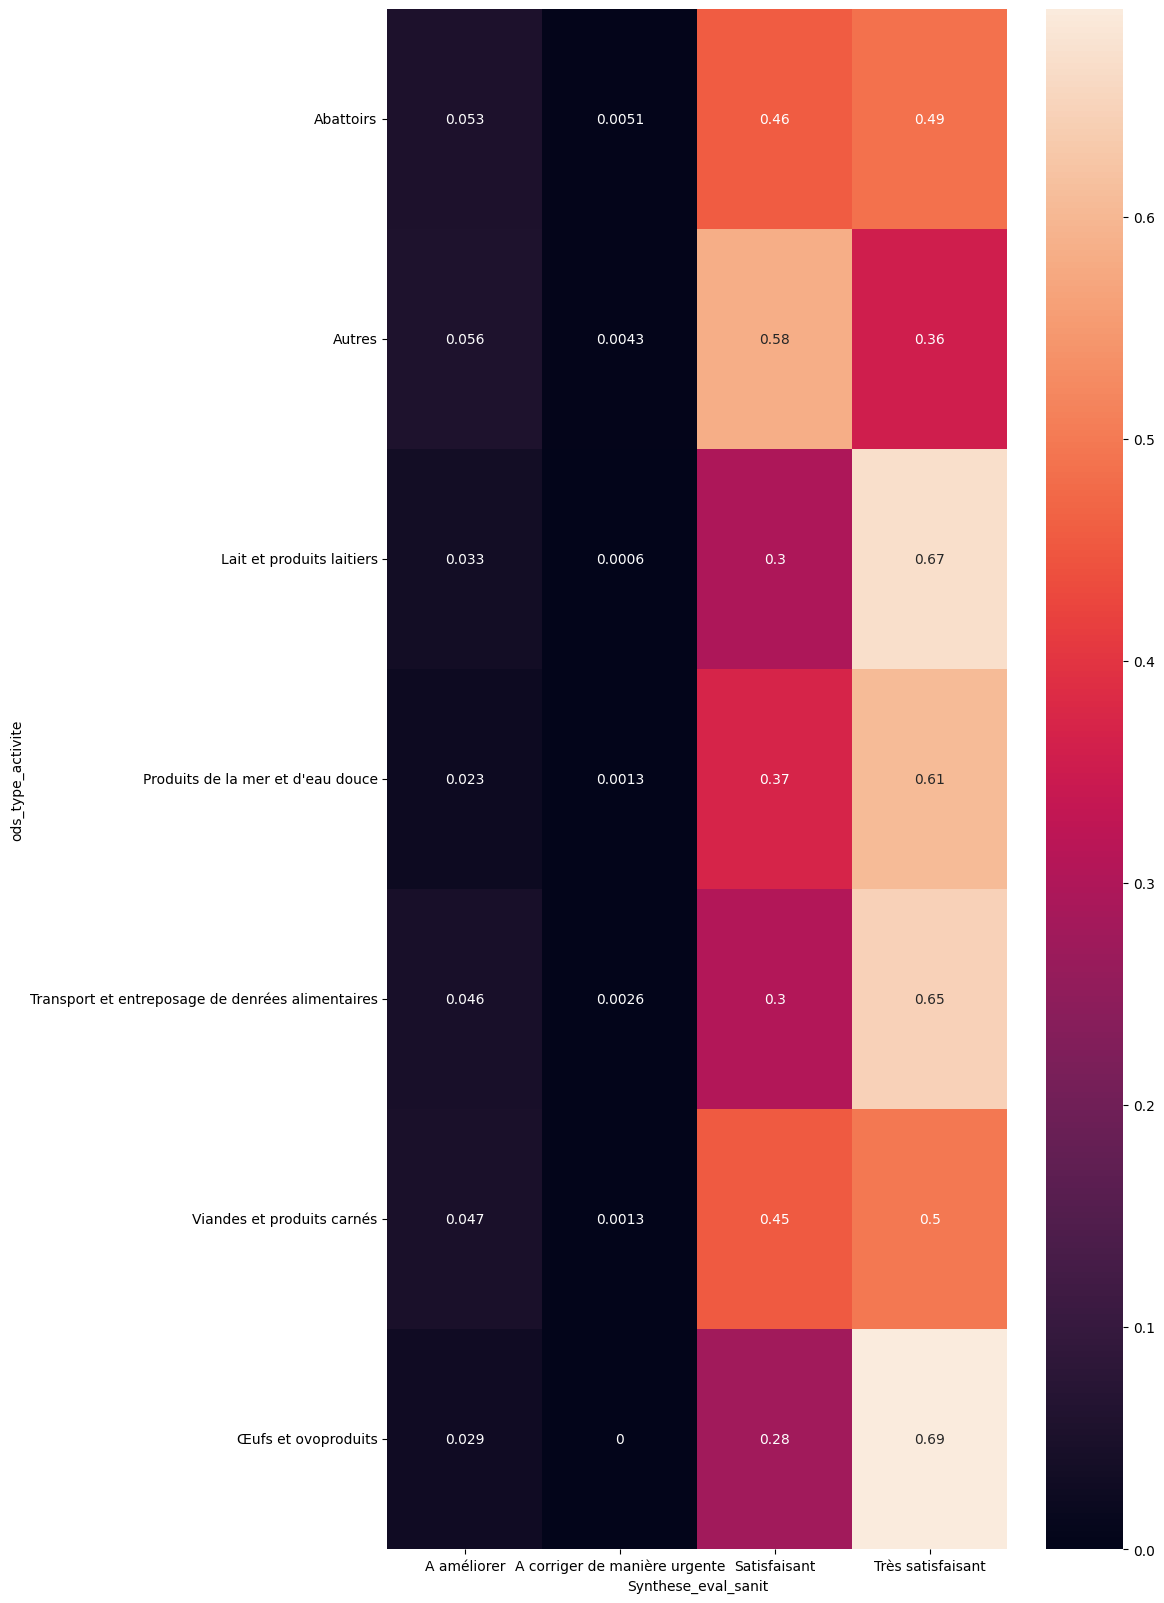

In [5]:
fig, ax = plt.subplots(figsize=(10, 20))
ax = sns.heatmap(cross, annot=True, ax=ax)

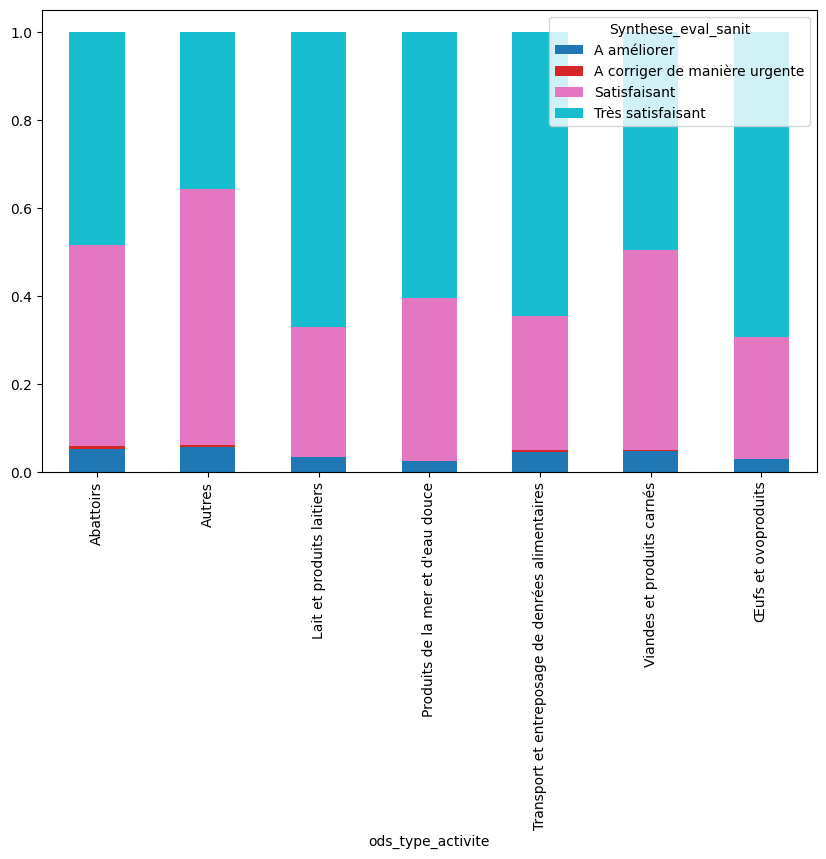

In [6]:
cross.plot(
    kind='bar', stacked=True, colormap='tab10', figsize=(10, 6),
)
plt.show()

- Recalculer le **tableau de contingence** précédent mais cette fois avec les **effectifs totaux** (paramètre `margins` de la fonction `pandas.crosstab()`)

In [7]:
cross = pd.crosstab(df["ods_type_activite"], df["Synthese_eval_sanit"], margins=True)
cross

Synthese_eval_sanit,A améliorer,A corriger de manière urgente,Satisfaisant,Très satisfaisant,All
ods_type_activite,,,,,
Abattoirs,52,5,451,480,988
Autres,1406,108,14617,8936,25067
Lait et produits laitiers,54,1,490,1108,1653
Produits de la mer et d'eau douce,36,2,569,933,1540
Transport et entreposage de denrées alimentaires,35,2,233,494,764
Viandes et produits carnés,112,3,1076,1176,2367
Œufs et ovoproduits,12,0,114,285,411
All,1707,121,17550,13412,32790


- A partir du **tableau de contingence** de la question précédente, calculer le **tableau des effectifs attendus** si les variables étaient **indépendantes**. A partir de ce tableau, calculer le **khi 2** grâce à la formule suivante :

$${\chi}^2=\sum_{i,j} \frac{(n_{i,j} - n_{i,j}^*)^2}{n_{i,j}^*}$$
$$\textit{Avec }n_{i,j}\textit{ l'effectif réel et }n_{i,j}^*\textit{ l'effectif que l'on aurait si les variables étaient indépendantes}$$

In [8]:
cross.loc["All"]

Synthese_eval_sanit
A améliorer                       1707
A corriger de manière urgente      121
Satisfaisant                     17550
Très satisfaisant                13412
All                              32790
Name: All, dtype: int64

In [9]:
cross.loc["All","All"]

32790

In [10]:
cross["All"]

ods_type_activite
Abattoirs                                             988
Autres                                              25067
Lait et produits laitiers                            1653
Produits de la mer et d'eau douce                    1540
Transport et entreposage de denrées alimentaires      764
Viandes et produits carnés                           2367
Œufs et ovoproduits                                   411
All                                                 32790
Name: All, dtype: int64

In [11]:
result = pd.concat([cross["All"]] * len(cross.loc["All"]), axis=1)
result

,All,All,All,All,All
ods_type_activite,,,,,
Abattoirs,988,988,988,988,988
Autres,25067,25067,25067,25067,25067
Lait et produits laitiers,1653,1653,1653,1653,1653
Produits de la mer et d'eau douce,1540,1540,1540,1540,1540
Transport et entreposage de denrées alimentaires,764,764,764,764,764
Viandes et produits carnés,2367,2367,2367,2367,2367
Œufs et ovoproduits,411,411,411,411,411
All,32790,32790,32790,32790,32790


In [12]:
result.columns = cross.loc["All"].index
result

Synthese_eval_sanit,A améliorer,A corriger de manière urgente,Satisfaisant,Très satisfaisant,All
ods_type_activite,,,,,
Abattoirs,988,988,988,988,988
Autres,25067,25067,25067,25067,25067
Lait et produits laitiers,1653,1653,1653,1653,1653
Produits de la mer et d'eau douce,1540,1540,1540,1540,1540
Transport et entreposage de denrées alimentaires,764,764,764,764,764
Viandes et produits carnés,2367,2367,2367,2367,2367
Œufs et ovoproduits,411,411,411,411,411
All,32790,32790,32790,32790,32790


In [13]:
print("Tableau des effectifs attendus si les variables étaient indépendantes : ")
indep_cross = (result * cross.loc["All"] / cross.loc["All","All"]).drop("All").drop("All", axis=1)
indep_cross

Tableau des effectifs attendus si les variables étaient indépendantes : 


Synthese_eval_sanit,A améliorer,A corriger de manière urgente,Satisfaisant,Très satisfaisant
ods_type_activite,,,,
Abattoirs,51.433852,3.645868,528.801464,404.118817
Autres,1304.951784,92.500976,13416.463861,10253.083379
Lait et produits laitiers,86.052790,6.099817,884.725526,676.121866
Produits de la mer et d'eau douce,80.170174,5.682830,824.245197,629.901799
Transport et entreposage de denrées alimentaires,39.772736,2.819274,408.911253,312.496737
Viandes et produits carnés,123.222598,8.734584,1266.875572,968.167246
Œufs et ovoproduits,21.396066,1.516651,219.977127,168.110156


In [14]:
khi_2 = ((cross.drop("All").drop("All", axis=1) - indep_cross)**2/indep_cross).sum().sum()
print(f"Valeur du khi 2 : {khi_2}")

Valeur du khi 2 : 1431.0707853069302


- Grâce à la fonction [scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html), retrouver la valeur du **khi 2**, le **degré de liberté** et le **tableau des effectifs attendus** calculés à la question précédente. Grâce à la valeur de la **p-value**, indiquer si le type d'**activité** a un impact sur le **résultat du test sanitaire** (statistiquement).

In [15]:
from scipy.stats import chi2_contingency

In [16]:
khi2, pval , ddl , contingent_theorique = chi2_contingency(pd.crosstab(df["ods_type_activite"], df["Synthese_eval_sanit"]))
khi2, pval , ddl , contingent_theorique

(1431.0707853069302,
 3.043209373128411e-293,
 18,
 array([[5.14338518e+01, 3.64586764e+00, 5.28801464e+02, 4.04118817e+02],
        [1.30495178e+03, 9.25009759e+01, 1.34164639e+04, 1.02530834e+04],
        [8.60527905e+01, 6.09981702e+00, 8.84725526e+02, 6.76121866e+02],
        [8.01701738e+01, 5.68283013e+00, 8.24245197e+02, 6.29901799e+02],
        [3.97727356e+01, 2.81927417e+00, 4.08911253e+02, 3.12496737e+02],
        [1.23222598e+02, 8.73458371e+00, 1.26687557e+03, 9.68167246e+02],
        [2.13960659e+01, 1.51665142e+00, 2.19977127e+02, 1.68110156e+02]]))

- Calculer le **V de Cramer** grâce à la formule suivante et **vérifier la valeur** en utilisant la fonction [scipy.stats.contingency.association](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.contingency.association.html) :

$$V=\sqrt\frac{{\chi}^2}{n\cdot min(c-1,r-1)}$$
$$\textit{Avec n l'effectif total, c le nombre de colonnes du tableau de contingence et r le nombre de lignes du tableau de contingence}$$

*Source : https://en.wikipedia.org/wiki/Cram%C3%A9r%27s_V*

In [17]:
import math
from scipy.stats.contingency import association

In [18]:
V = math.sqrt(khi2/(df.shape[0]*3))
V

0.12061441707378054

In [19]:
association(pd.crosstab(df["ods_type_activite"], df["Synthese_eval_sanit"]), method="cramer")

0.12061441707378054

- Calculer le **T de Tschuprow** grâce à la formule suivante et **vérifier la valeur** en utilisant la fonction [scipy.stats.contingency.association](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.contingency.association.html) :

$$T=\sqrt\frac{{\chi}^2}{n\cdot \sqrt{(c-1)(r-1)}}$$
$$\textit{Avec n l'effectif total, c le nombre de colonnes du tableau de contingence et r le nombre de lignes du tableau de contingence}$$

*Source : https://en.wikipedia.org/wiki/Tschuprow%27s_T*

In [20]:
T = math.sqrt(khi2/(df.shape[0]*math.sqrt(6*3)))
T

0.10142423094525849

In [21]:
association(pd.crosstab(df["ods_type_activite"], df["Synthese_eval_sanit"]), method="tschuprow")

0.10142423094525847

### 🥇 Analyse d'une caractéristique quantitative et d'une caractéristique qualitative

- Analyser le **lien entre les variables** "Synthese_eval_sanit" et "latitude" d'une part et "Synthese_eval_sanit" et "longitude" d'autre part grâce au **test statistique de Kruskal-Wallis**

*Ressources :*

- https://fr.wikipedia.org/wiki/Test_de_Kruskal-Wallis
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html

In [ ]:
from scipy import stats

In [ ]:
kstat, pval = stats.kruskal(*[group["latitude"].values for name, group in df.groupby("Synthese_eval_sanit")])
kstat, pval

In [ ]:
kstat, pval = stats.kruskal(*[group["longitude"].values for name, group in df.groupby("Synthese_eval_sanit")])
kstat, pval

- **Aalyser graphiquement** (histogrammes et boîtes à moustaches) le lien entre variables précédentes à l'aide des bibliothèques **Seaborn** et **Plotly**

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x="longitude", hue="Synthese_eval_sanit")
plt.show()

In [ ]:
fig = px.histogram(df, x="latitude", color="Synthese_eval_sanit")
fig.show()

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="latitude", y="Synthese_eval_sanit")
plt.show()

In [ ]:
fig = px.box(df, x="longitude", y="Synthese_eval_sanit")
fig.show()

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="longitude", y="Synthese_eval_sanit")
plt.show()

- La **force de la corrélation** entre une **variable quantitative** et une **variable qualitative** peut être mesurée par le **rapport de corrélation**. Pour le calculer, on a besoin de deux termes : la **variation totale** et la **variation interclasse**. Calculer la **variation totale** à partir de la **formule** suivante :

$$\text{variation totale = }\sum_{i=1}^{k}\sum_{j=1}^{n_i} (y_{ij}-\overline{y})^2$$
$$\text{avec k le nombre de classes ,}{n_i}\text{ le nombre d'élèments dans la classe i et }\overline{y}\text{ la moyenne de la latitude ou de la longitude}$$

In [ ]:
latitude_tot_var = ((df["latitude"] - df["latitude"].mean())**2).sum()
longitude_tot_var = ((df["longitude"] - df["longitude"].mean())**2).sum()
latitude_tot_var, longitude_tot_var

- Calculer la **variation interclasse** à partir de la **formule** suivante :

$$\text{variation interclasse = }\sum_{i=1}^{k}{n_i} (\overline{y_i}-\overline{y})^2$$
$$\text{avec k le nombre de classes, }{n_i}\text{ le nombre d'élèments dans la classe i}$$
$$\overline{y}\text{ la moyenne de la latitude ou de la longitude et }\overline{y_i}\text{ la moyenne de la latitude ou de la longitude de la classe i}$$

In [ ]:
y_bar = df["latitude"].mean()
yi_bar = df[["latitude", "Synthese_eval_sanit"]].groupby("Synthese_eval_sanit").agg(["mean", "count"])["latitude"]
latitude_inter_var = (yi_bar["count"]*(yi_bar["mean"] - y_bar)**2).sum()
latitude_inter_var

In [ ]:
y_bar = df["longitude"].mean()
yi_bar = df[["longitude", "Synthese_eval_sanit"]].groupby("Synthese_eval_sanit").agg(["mean", "count"])["longitude"]
longitude_inter_var = (yi_bar["count"]*(yi_bar["mean"] - y_bar)**2).sum()
longitude_inter_var

- Calculer le **rapport de corrélation** grâce à la formule suivante (compris entre 0 et 1, **0** signifie que les **moyennes** sont **égales** et donc qu'il n'y a **pas de relation entre les variables qualitative** et **quantitative**. A l'inverse, plus la valeur est proche de 1, plus les variables sont liées) :

$$\eta^2 = \frac{\text{variation interclasse}}{\text{variation totale}}$$

In [ ]:
eta_latitude = latitude_inter_var/latitude_tot_var
eta_longitude = longitude_inter_var/longitude_tot_var
print(f"Le rapport de corrélation entre la latitude et le résultat du contrôle sanitaire vaut {round(eta_latitude, 2)}")
print(f"Le rapport de corrélation entre la latitude et le résultat du contrôle sanitaire vaut {round(eta_longitude, 2)}")

### 🥇 Analyse de deux caractéristiques quantitatives

- Calculer les **corrélations de Pearson** et **Spearman** entre la **latitude** et la **longitude**

In [ ]:
pearson_corr = round(df[["latitude", "longitude"]].corr(method='pearson').loc["latitude","longitude"], 2)
spearman_corr = round(df[["latitude", "longitude"]].corr(method='spearman').loc["latitude","longitude"], 2)
print(f"Corrélation de Pearson {pearson_corr}")
print(f"Corrélation de Spearman {spearman_corr}")

- Tracer le **graphique de nuage de points** entre la **latitude** et la **longitude** avec la **droite de régression linéaire** (avec les bibliothèques Seaborn et Plotly)

In [ ]:
sns.jointplot(x="longitude", y="latitude", data=df, kind="reg", scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.show()

In [ ]:
fig = px.scatter(df, x="longitude", y="latitude", trendline="ols")
fig.show()

## 🚀 Pour aller plus loin

- [Cramér's V - Wikipedia](https://en.wikipedia.org/wiki/Cram%C3%A9r%27s_V)

___
*👨‍🏫 [Pierre-Loic BAYART](https://www.linkedin.com/in/pierreloicbayart/) - Formation développeur d'applications spécialisation data analyst - Webforce3 - Grenoble Ecole de Management*
___
Source images d'illustration : Image par OpenClipart-Vectors de Pixabay